### problem Statement
- These models designed to analyse web analytics data and predict whether a customer will buy product or not during their visit.
    - **These things needs to be monitored,**
    - Number of times URLs visited
    - Information about product
    - Recorded the number of each page type visited
    - Time spent on the pages.

### 1. E-Commerce application goal
 Any eCommerce application main goal is,
  * Converting browsers into buyers.

**2. Purchase intention model**
- Ecommerce purchase intention models predict the probability of each
customer making a purchase or not.
- Once we identify then we can target those customers.
- We will learn here how they work and build model
-Ecommerce purchase intention models analyse click-stream consumer
behaviour data from web analytics platforms.
- After analysis it can predict whether a customer will make a purchase
during their visit.
- These online shopping models are used to examine real time web
analytics data and predict the probability of each customer making a
purchase, so the retailer can serve a carefully targeted promotion to try
and persuade those less likely to purchase.

In [1]:
### Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df['Administrative_Duration'].value_counts()

0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64

In [4]:
df.shape

(12330, 18)

- This dataset contains 12330 rows with 18 features/columns

In [5]:
##Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Features Descriptions:**

**Administrative:** This is the number of pages of this type (administrative) that the user visited.

**Administrative_Duration:** This is the amount of time spent in this category of pages.

**Informational:** This is the number of pages of this type (informational) that the user visited.

**Informational_Duration:** This is the amount of time spent in this category of pages.

**ProductRelated:** This is the number of pages of this type (product related) that the user visited.

**ProductRelated_Duration:** This is the amount of time spent in this category of pages.

**BounceRates:** The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

**ExitRates:** The percentage of pageviews on the website that end at that specific page.

**PageValues:** The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

**SpecialDay:** This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. 

**Month:** Contains the month the pageview occurred, in string form.

**OperatingSystems:** An integer value representing the operating system that the user was on when viewing the page.

**Browser:** An integer value representing the browser that the user was using to view the page.

**Region:** An integer value representing which region the user is located in.

**TrafficType:** An integer value representing what type of traffic the user is categorized into.

**VisitorType:** A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

**Weekend:** A boolean representing whether the session is on a weekend.

**Revenue:** A boolean representing whether or not the user completed the purchase.

In [6]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

- This dataset is not conatining any null values

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.describe(include=['object','bool'])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


### Data Visualization(EDA)

**Univariate Analysis**

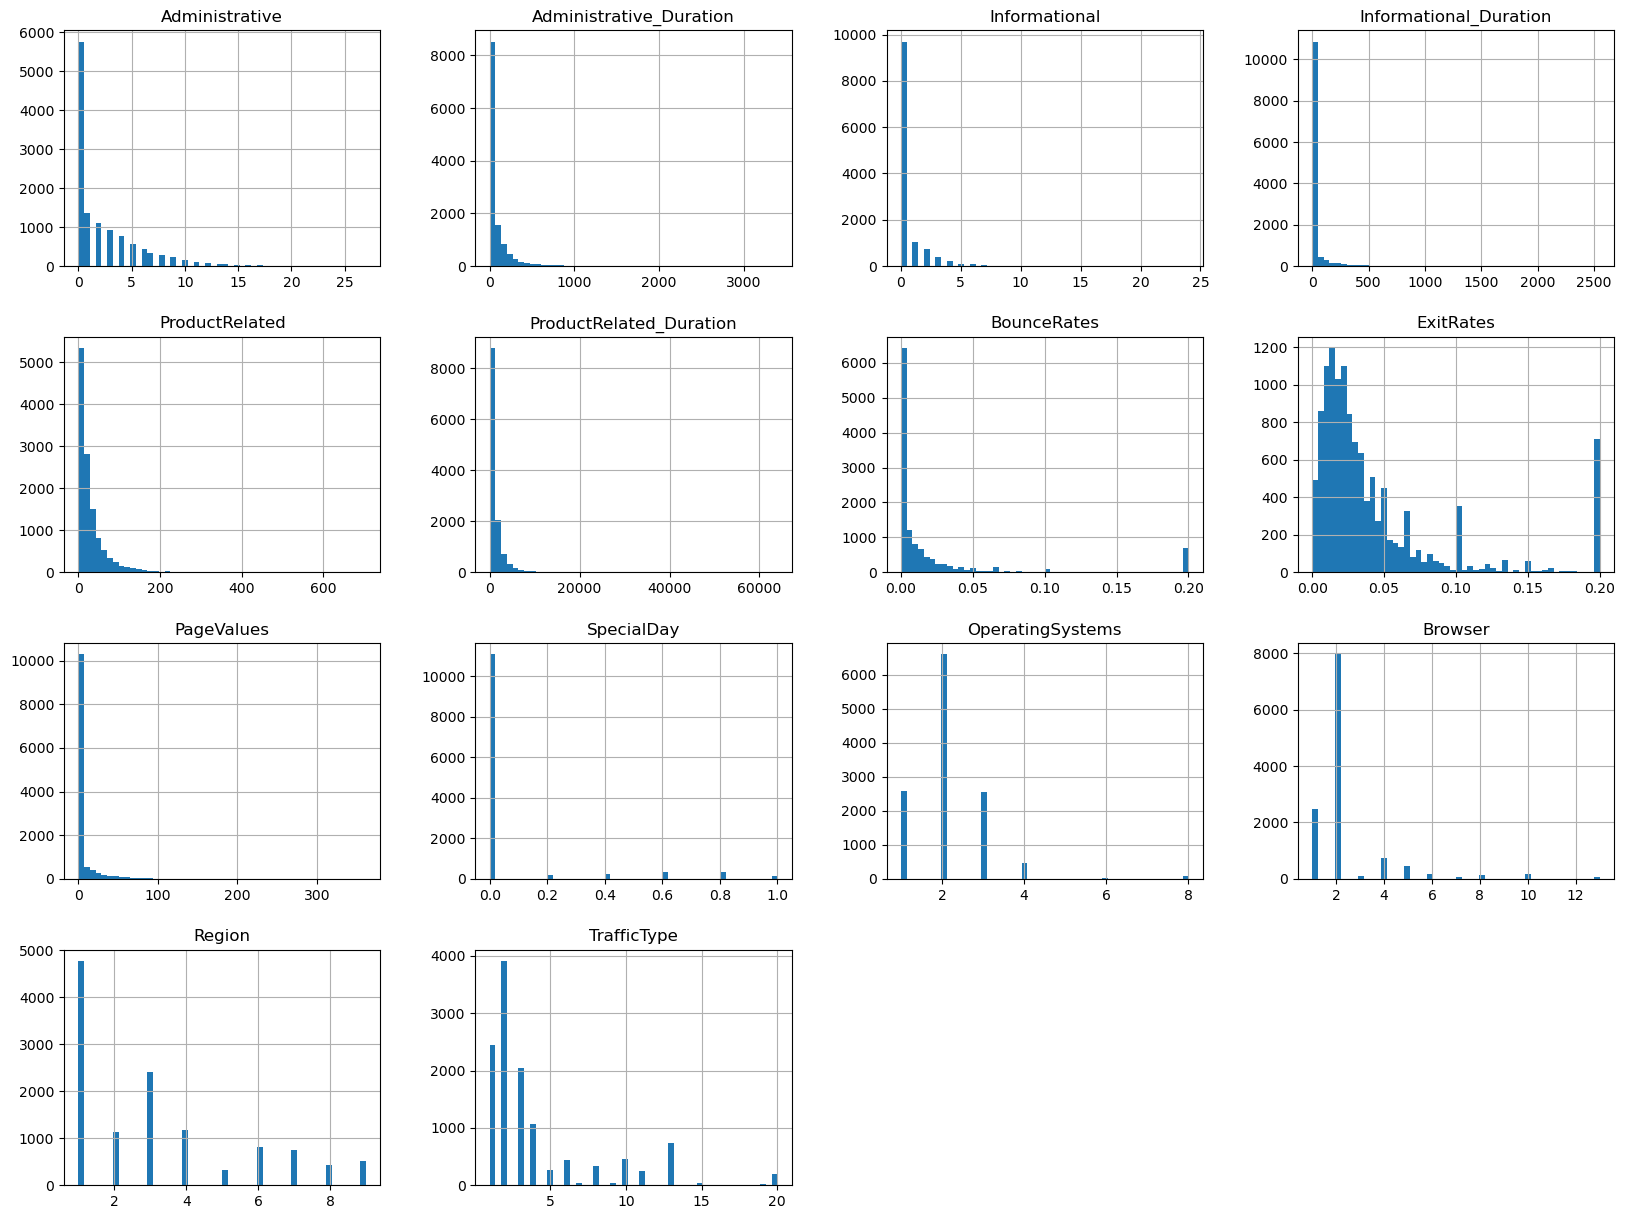

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

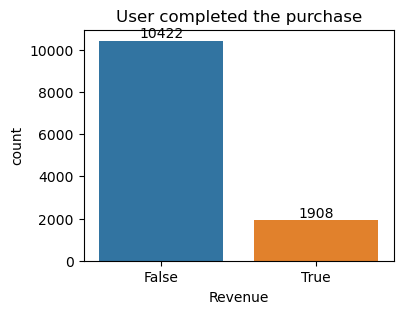

In [11]:
plt.figure(figsize = (4,3))
ax = sns.countplot(df['Revenue'])
plt.title('User completed the purchase')
plt.xticks(rotation = 0)
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()

**Observations:** We can see that the about 845 users didn,t complete the purchase.

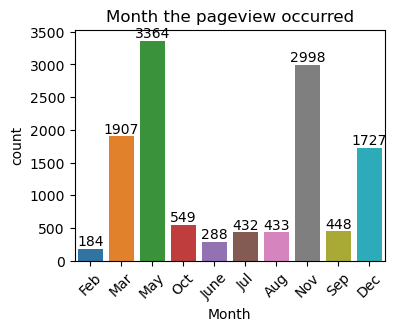

In [12]:
plt.figure(figsize = (4,3))
ax = sns.countplot(df['Month'])
plt.title('Month the pageview occurred')
plt.xticks(rotation = 45)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

**Observations:** From above we can see that most pageview occured in the month of May followed by Nov, March and December

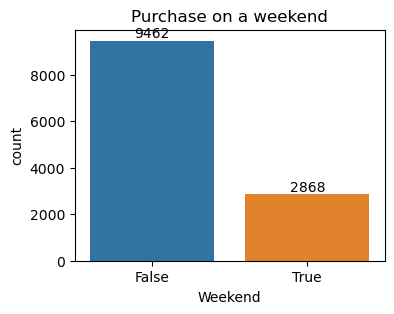

In [13]:
plt.figure(figsize = (4,3))
ax = sns.countplot(df['Weekend'])
plt.title('Purchase on a weekend')
plt.xticks(rotation = 0)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

**Observations:** We can see that very least purchase are made on the weekend.

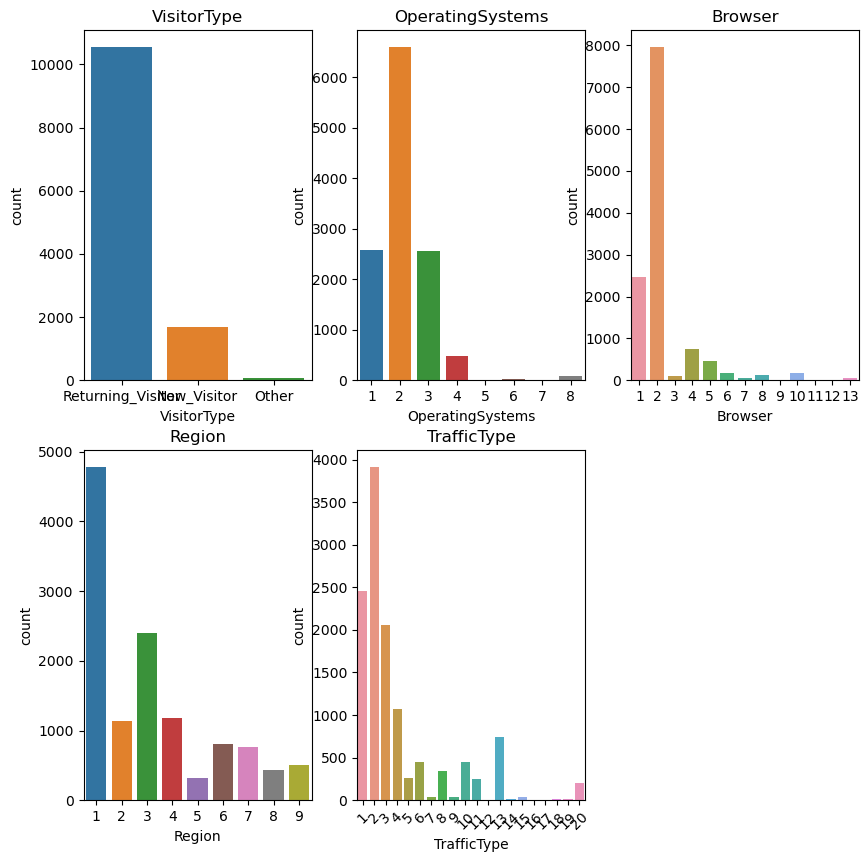

In [14]:
plt.figure(figsize = (10,10))
plt.subplot(2,3,1)
sns.countplot(df['VisitorType'])
plt.title('VisitorType')

plt.subplot(2,3,2)
sns.countplot(df['OperatingSystems'])
plt.title('OperatingSystems')

plt.subplot(2,3,3)
sns.countplot(df['Browser'])
plt.title('Browser')

plt.subplot(2,3,4)
sns.countplot(df['Region'])
plt.title('Region')

plt.subplot(2,3,5)
sns.countplot(df['TrafficType'])
plt.title('TrafficType')
plt.xticks(rotation=45)

plt.show()

**Top 3 OperatingSystems used by Users**.

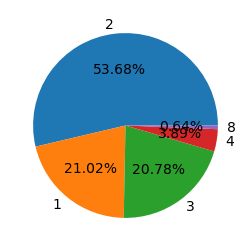

In [15]:
plt.figure(figsize = (4,3))
os_val = df['OperatingSystems'].value_counts().values
os_names = df['OperatingSystems'].value_counts().index
plt.pie(x=os_val[:5], labels=os_names[:5], autopct = '%1.2f%%')
plt.show()

**Top 5 region, the user is located in.**

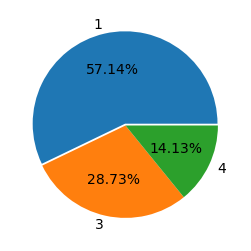

In [16]:
plt.figure(figsize = (4,3))
region_val = df['Region'].value_counts().values
region_names = df['Region'].value_counts().index
plt.pie(x=region_val[:3], labels=region_names[:3], autopct = '%1.2f%%',explode=[0.02,0,0])
plt.show()

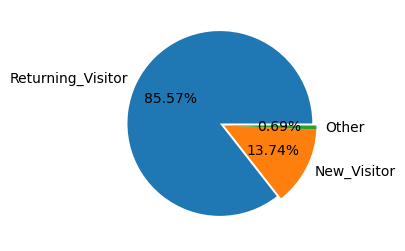

In [17]:
plt.figure(figsize = (4,3))
v_val = df['VisitorType'].value_counts().values
v_names = df['VisitorType'].value_counts().index
plt.pie(x=v_val, labels=v_names, autopct = '%1.2f%%', explode=[0.05,0,0])
plt.show()

**Bivariate Analysis**

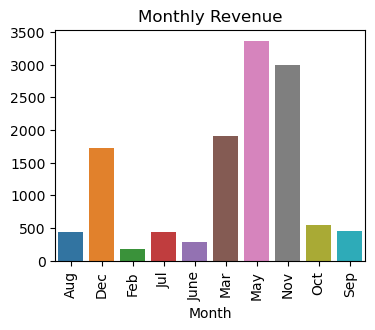

In [18]:
monthly_revenue  = df.groupby(['Month']).count()['Revenue']

plt.figure(figsize=(4,3))
sns.barplot(x = monthly_revenue.index, y= monthly_revenue.values)
plt.title('Monthly Revenue')
plt.xticks(rotation=90)
plt.show()

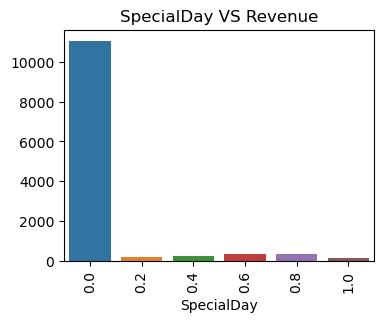

In [19]:
specialday_revenue  = df.groupby(['SpecialDay']).count()['Revenue']

plt.figure(figsize=(4,3))
sns.barplot(x = specialday_revenue.index, y= specialday_revenue.values)
plt.title('SpecialDay VS Revenue')
plt.xticks(rotation=90)
plt.show()

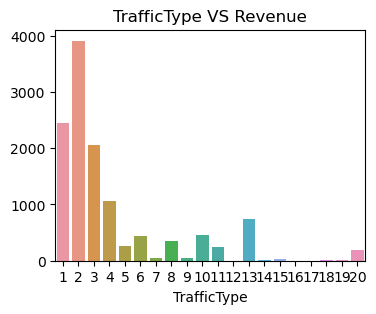

In [20]:
TrafficType_revenue  = df.groupby(['TrafficType']).count()['Revenue']

plt.figure(figsize=(4,3))
sns.barplot(x = TrafficType_revenue.index, y= TrafficType_revenue.values)
plt.title('TrafficType VS Revenue')
plt.xticks(rotation=0)
plt.show()

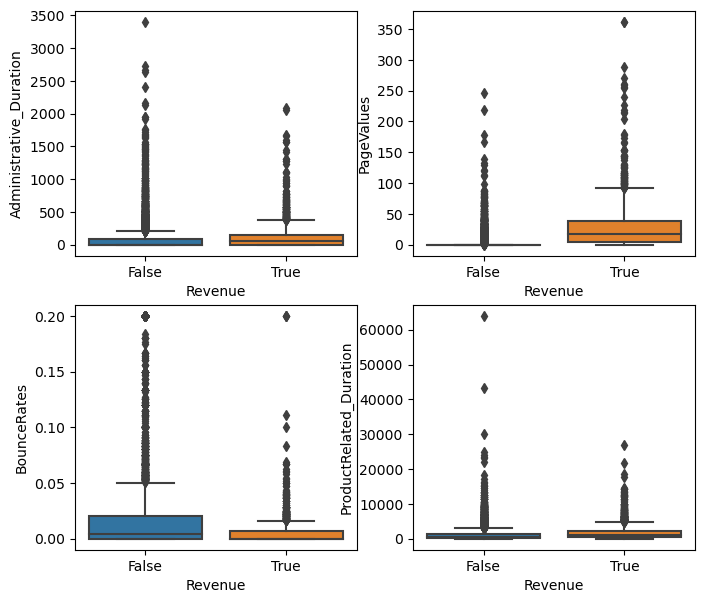

In [21]:
plt.figure(figsize=(8,7))

plt.subplot(2,2,1)
sns.boxplot(df["Revenue"], df["Administrative_Duration"])

plt.subplot(2,2,2)
sns.boxplot(df["Revenue"], df["PageValues"])

plt.subplot(2,2,3)
sns.boxplot(df["Revenue"], df["BounceRates"])

plt.subplot(2,2,4)
sns.boxplot(df["Revenue"], df["ProductRelated_Duration"])

plt.show()

- We can see Administrative_Duration, pagevalues, BounceRates and ProductRelated_Duration has a lot of outliers

**Feature engineering**
- The Weekend and Revenue columns are currently set to Boolean values,
so we first need to convert into binary values.

In [22]:
df['Weekend'].unique()

array([False,  True])

In [23]:
df['Weekend'] = df['Weekend'].replace((True, False),(1,0))
df['Revenue'] = df['Revenue'].replace((True, False),(1,0))
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [24]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [25]:
df['Returning_Visitor'] = np.where(df['VisitorType']=='Returning_Visitor',1,0)  

In [26]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,1


In [27]:
df.drop('VisitorType', axis=1, inplace=True)

In [28]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,1,0,1


In [29]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

**Applying Ordinal Encoding on Month column**

In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['Month'] = oe.fit_transform(df[['Month']])

In [31]:
df['Month'].unique()

array([2., 5., 6., 8., 4., 3., 0., 7., 9., 1.])

In [32]:
df['Month'] = df['Month'].astype('int')

In [33]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,1


In [34]:
df['Revenue'].value_counts()  #Target variable is highly imbalanced

0    10422
1     1908
Name: Revenue, dtype: int64

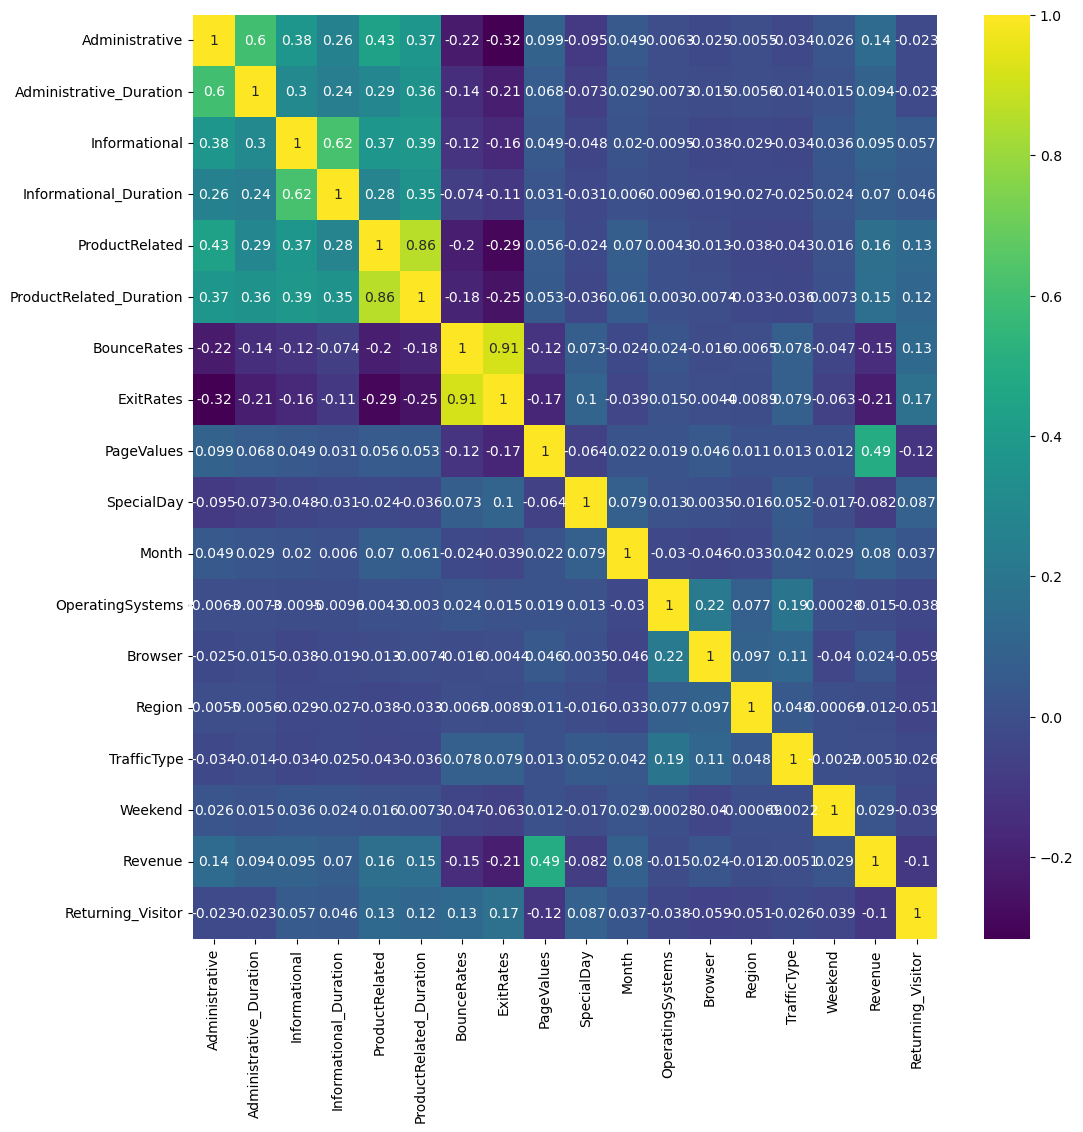

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [36]:
threshold=0.85

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
correlation(df.iloc[:,:-1],threshold)

{'ExitRates', 'ProductRelated_Duration'}

In [38]:
df = df.drop(columns =['ExitRates','ProductRelated_Duration'], axis=1)

In [39]:
result = df[df.columns[1:]].corr()['Revenue']
result.sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
Informational              0.095200
Administrative_Duration    0.093587
Month                      0.080150
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
Returning_Visitor         -0.103843
BounceRates               -0.150673
Name: Revenue, dtype: float64

- The strongest predictor of conversion is the PageValues column.
- This is obviously higher for customers who have viewed product, basket,
and checkout pages.

In [40]:
df.shape

(12330, 16)

In [41]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Returning_Visitor
0,0,0.0,0,0.0,1,0.20,0.0,0.0,2,1,1,1,1,0,0,1
1,0,0.0,0,0.0,2,0.00,0.0,0.0,2,2,2,1,2,0,0,1
2,0,0.0,0,0.0,1,0.20,0.0,0.0,2,4,1,9,3,0,0,1
3,0,0.0,0,0.0,2,0.05,0.0,0.0,2,3,2,2,4,0,0,1
4,0,0.0,0,0.0,10,0.02,0.0,0.0,2,3,3,1,4,1,0,1


In [42]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [43]:
print(X.shape, y.shape)

(12330, 15) (12330,)


In [44]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [45]:
print(model.feature_importances_)

[0.06281236 0.0649359  0.03281618 0.03430433 0.0990157  0.07373627
 0.36365545 0.00834109 0.05742864 0.0341519  0.03553534 0.05315692
 0.05484215 0.01128956 0.01397821]


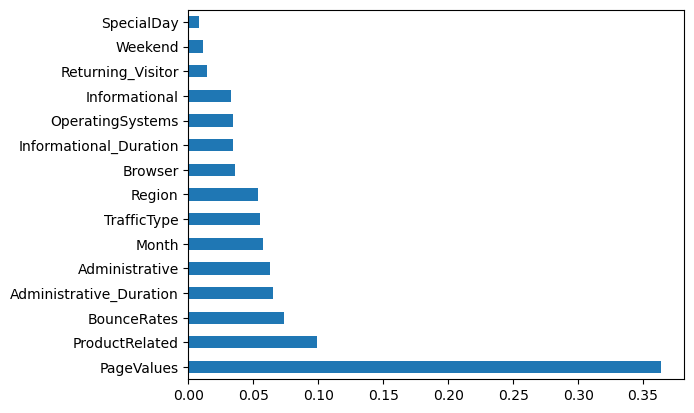

In [46]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

### Information Gain
Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative
value, which measures the dependency between the variables. It is equal
to zero if and only if two random variables are independent, and higher
values mean higher dependency.

In [47]:
from sklearn.feature_selection import mutual_info_classif

In [48]:
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

PageValues                 0.163241
ProductRelated             0.027200
BounceRates                0.022204
Administrative             0.020621
Administrative_Duration    0.019484
Month                      0.015591
TrafficType                0.014310
SpecialDay                 0.007311
Informational              0.006768
Returning_Visitor          0.004160
Region                     0.001703
OperatingSystems           0.000651
Informational_Duration     0.000131
Browser                    0.000000
Weekend                    0.000000
dtype: float64

- The Features having highest values are most important features,
so we can drop the features having less or 0 importance.

In [49]:
X = X.drop(columns=['Browser','Region','Weekend'], axis=1)

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_new, y_new = smote.fit_resample(X,y)

print('Before SMOTE, dataset shape')
print(df['Revenue'].value_counts())
print('--------------------------')

print('After SMOTE, dataset shape')
print(y_new.value_counts())

Before SMOTE, dataset shape
0    10422
1     1908
Name: Revenue, dtype: int64
--------------------------
After SMOTE, dataset shape
0    10422
1    10422
Name: Revenue, dtype: int64


In [55]:
print(X.shape, y.shape)

(12330, 12) (12330,)


### Modelling and Evaluation
**Train - Test Split**

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [57]:
print(X_train.shape, X_test.shape)

(9864, 12) (2466, 12)


In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.69762895, -0.45837296, -0.3952571 , ..., -0.14104525,
        -0.51529827,  0.41260827],
       [-0.09932334, -0.19054368, -0.3952571 , ..., -1.23223768,
        -0.26702483,  0.41260827],
       [-0.39847615, -0.40198785, -0.3952571 , ..., -0.14104525,
        -0.76357171,  0.41260827],
       ...,
       [-0.69762895, -0.45837296, -0.3952571 , ..., -0.14104525,
         0.47779549,  0.41260827],
       [-0.69762895, -0.45837296, -0.3952571 , ..., -0.14104525,
         0.97434237, -2.42360632],
       [-0.39847615, -0.08905048, -0.3952571 , ...,  2.04133961,
         0.97434237, -2.42360632]])

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [60]:
##Creating a function to calculate best model for this problem
def find_best_model(X,y):
    models = {'logistic_regression':{'model':LogisticRegression(), 'parameters':{'penalty' : ['l1', 'l2', 'elasticnet', 'none']}},
             
             'decision_tree':{'model':DecisionTreeClassifier(random_state=0), 'parameters':{'criterion':['gini','entropy'],'max_depth':[1,2,3,4]}},
             
             'random_forest':{'model':RandomForestClassifier(random_state=0), 'parameters':{'n_estimators':[5,10,15,20,50,60,100], 'criterion':['gini','entropy']}},
             
              'xg_boost':{'model':XGBClassifier(), 'parameters':{'n_estimators':[10,20,40], 'max_depth':[3,4,5],'gamma':[0,0.3,0.5,1]}},
             
              'ada_boost':{'model':AdaBoostClassifier(), 'parameters':{'n_estimators':[10,20,40,50]}}}
    
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X,y)
        scores.append({'model': model_name,'best_parameters':gs.best_params_, 'score':gs.best_score_})
    return pd.DataFrame(scores, columns=['model','best_parameters', 'score'])

find_best_model(X,y)

,model,best_parameters,score
0,logistic_regression,{'penalty': 'l2'},0.883942
1,decision_tree,"{'criterion': 'gini', 'max_depth': 2}",0.887429
2,random_forest,"{'criterion': 'gini', 'n_estimators': 100}",0.893836
3,xg_boost,"{'gamma': 1, 'max_depth': 4, 'n_estimators': 20}",0.895134
4,ada_boost,{'n_estimators': 10},0.881427


- Since xg_boost is giving highest accuracy we will select the XGBClassifier model for our problem.

In [61]:
# Using cross_val_score for getting highest accuracy

scores = cross_val_score(XGBClassifier(gamma=1, max_depth=4, n_estimators=20), X,y, cv=5)
print('Cross validation Score:{}%'.format(round(sum(scores)*100/len(scores)),3))

Cross validation Score:90%


In [79]:
#Creatin XGBClassifier model
xgb_model = XGBClassifier(gamma=1, max_depth=4, n_estimators=20)
xgb_model.fit(X_train,y_train)
xgb_model.score(X_test, y_test)

0.9055150040551501

In [80]:
ypred_train = xgb_model.predict(X_train)
ypred_test = xgb_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))
print('Cross validation Score:{}%'.format(round(sum(scores)*100/len(scores)),3))

Train Accuracy: 0.9165652879156528
Test Accuracy: 0.9055150040551501
Cross validation Score:90%


In [81]:
cf_matrix = confusion_matrix(y_test, ypred_test)
cf_matrix

array([[2004,   73],
       [ 160,  229]], dtype=int64)

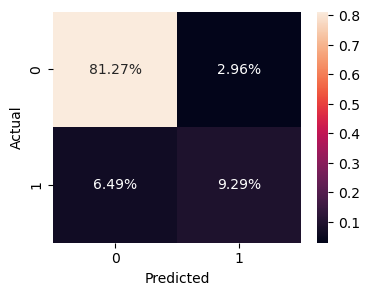

In [83]:
plt.figure(figsize=(4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2077
           1       0.76      0.59      0.66       389

    accuracy                           0.91      2466
   macro avg       0.84      0.78      0.80      2466
weighted avg       0.90      0.91      0.90      2466



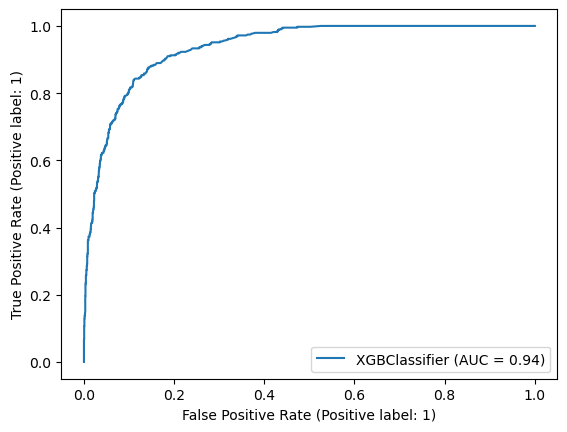

In [85]:
plot_roc_curve(model,X_test,y_test)
plt.show()

**Saving the model**

In [86]:
from joblib import dump

dump(model, 'xgb_model.joblib')

['xgb_model.joblib']

**Loading the model**

In [87]:
from joblib import load

loaded_model = load('xgb_model.joblib')